# Graphing GSEA HALLMARK pathways for CD38+CD39+ and CD38-CD39- populations in Teee RNAseq
  ### https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideFrame.html
  ### *GSEA desktop application 
  ### *https://www.pnas.org/doi/abs/10.1073/pnas.0506580102
## data analyzed by GSEA 01Sept2022
### file folder Teee_pp_nn.Gsea.1662067284673

In [2]:
#import libraries
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt

## Graphing the pathways based on NES value
### Normalized Enrichment Score (NES)
#### primary statistic for examining gene set enrichment results
#### accounts for differences in gene set size and in correlations between gene sets and the expression dataset
#### NES can be used to compare analysis results across gene sets

In [2]:
# from the GSEA output folder: 
#read in files for the pos_pos (double positive) and neg_neg (double negative) reports
# gsea_report_for_pos_pos_1662067284673.tsv
# gsea_report_for_neg_neg_1662067284673.tsv
df_pp = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_nn.Gsea.1662067284673/gsea_report_for_pos_pos_1662067284673.tsv', delimiter = '\t')
df_nn = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_nn.Gsea.1662067284673/gsea_report_for_neg_neg_1662067284673.tsv', delimiter = '\t')

### merge/join/concatenate the two dataframes- pp and pp  pathway scores for making one graph.

In [3]:
# df_pp the pos_pos file
# df_nn the neg_neg file

df_combine = pd.concat([df_pp, df_nn], axis=0)

In [4]:
# combined file should have all 50 pathways 
df_combine.shape

(50, 12)

In [5]:
# Columns will have name of pathways and GSEA statistics 
list(df_combine.columns) 

['NAME',
 'GS<br> follow link to MSigDB',
 'GS DETAILS',
 'SIZE',
 'ES',
 'NES',
 'NOM p-val',
 'FDR q-val',
 'FWER p-val',
 'RANK AT MAX',
 'LEADING EDGE',
 'Unnamed: 11']

In [6]:
#rename columns for graphing purposes (get rid of spaces and dashes)
df_combine=df_combine.rename(columns={'FDR q-val': 'FDR_qval', 'NOM p-val': 'NOM_pval'})

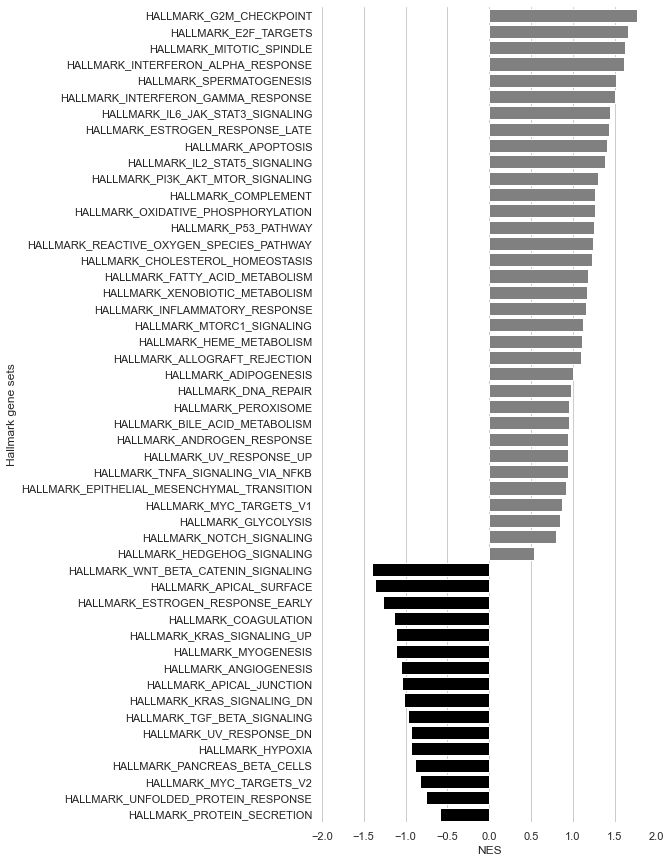

In [7]:
#graph a barplot based on NES score 
sns.set_theme(style="whitegrid")

# dataframe used is the combined df
data = df_combine 

# color the bars based on NES values
palette=["black" if x<0 else 'gray' for x in data.NES] 


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

#plot NES and pathway name
sns.barplot(x="NES", y="NAME", data = df_combine, palette=palette)

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-2, 2), ylabel="Hallmark gene sets")
sns.despine(left=True, bottom=True)

#save/write the file
#plt.savefig("Fig_name_here.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Cluster/Heatmap on the genes in top pathway of the pos_pos cell population
#### Seaborn clustermap
#### https://seaborn.pydata.org/generated/seaborn.clustermap.html?highlight=cluster#seaborn.clustermap

#### Example: Top 50 features (100 genes total) and the G2M_CHECKPOINT pathway

### NOTE:  these heatmaps will look slightly different than the ones generated by GSEA 

In [8]:
# heatmap of the top 50 features (50 up, 50 down)
#read in gct file, skip first 2 rows
df_top = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_nn.Gsea.1662067284673/heat_map_Top_50_Features.gct', 
                     skiprows=2, delimiter = '\t')

In [10]:
# for a cluster/heatmap we just need gene names and expression values
# remove 'Description' column Not necessary. 
# reset index
df_top_viz= df_top.drop(columns=['DESCRIPTION'])
df_top_viz= df_top_viz.set_index(df_top_viz.columns[0])
df_top_viz= df_top_viz.rename_axis('Gene_Name')

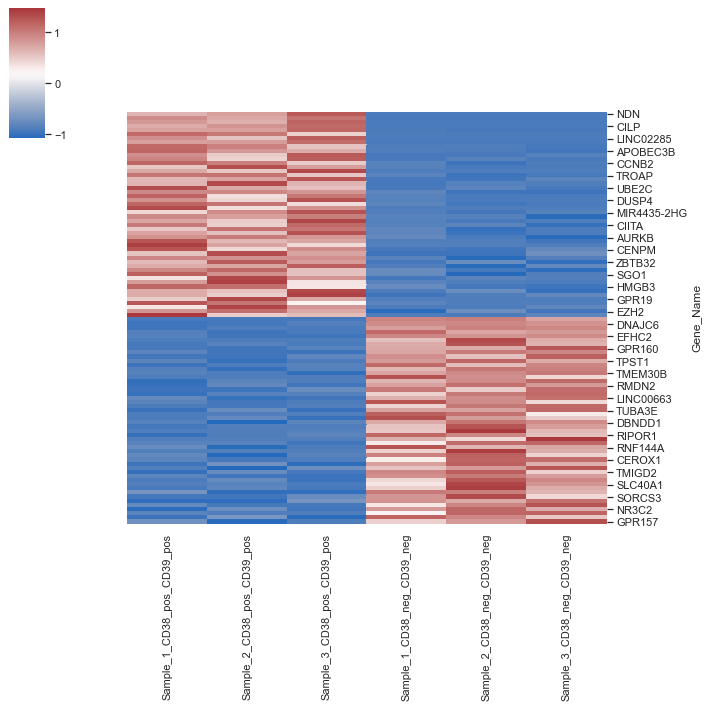

In [14]:
# z-score across rows (0)
g = sns.clustermap(df_top_viz, z_score=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=False, col_cluster=False )

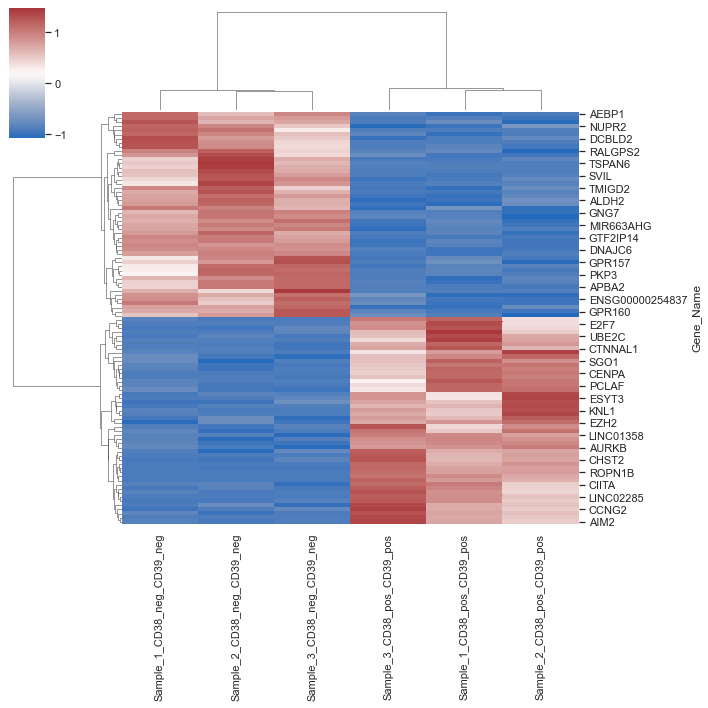

In [15]:
# z-score across rows (0)
# clustering by gene (rows) and by sample (columns)
g = sns.clustermap(df_top_viz, z_score=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=True, col_cluster=True )

# not all 100 genes are shown, likely due to figsize dimensions

In [9]:
#read in gct file; skip first two rows of this file
df_G2M = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_nn.Gsea.1662067284673/HALLMARK_G2M_CHECKPOINT.gct', 
                     skiprows=2, delimiter = '\t')

In [10]:
df_G2M.head()

,NAME,DESCRIPTION,Sample_1_CD38_pos_CD39_pos,Sample_2_CD38_pos_CD39_pos,Sample_3_CD38_pos_CD39_pos,Sample_1_CD38_neg_CD39_neg,Sample_2_CD38_neg_CD39_neg,Sample_3_CD38_neg_CD39_neg
0,CENPA,centromere protein A [Source:HGNC Symbol;Acc:H...,124.77783,118.62224,83.491196,0.736650,0.000000,0.000000
1,CCNB2,cyclin B2 [Source:HGNC Symbol;Acc:HGNC:1580],1667.05550,1527.10520,1153.371200,107.550860,0.000000,57.372290
2,KNL1,kinetochore scaffold 1 [Source:HGNC Symbol;Acc...,321.11072,493.21878,379.288570,17.679592,0.000000,4.781024
3,TROAP,trophinin associated protein [Source:HGNC Symb...,272.02750,274.70413,201.571600,19.889542,0.000000,5.976280
4,UBE2C,ubiquitin conjugating enzyme E2 C [Source:HGNC...,334.12076,244.73640,221.848020,0.736650,15.093233,0.000000


In [11]:
# for a cluster/heatmap we just need gene names and expression values
# remove 'Description' column Not necessary. 
# reset index
df_G2M_viz= df_G2M.drop(columns=['DESCRIPTION'])
df_G2M_viz= df_G2M_viz.set_index(df_G2M_viz.columns[0])
df_G2M_viz= df_G2M_viz.rename_axis('Gene_Name')

In [12]:
df_G2M_viz.head()

,Sample_1_CD38_pos_CD39_pos,Sample_2_CD38_pos_CD39_pos,Sample_3_CD38_pos_CD39_pos,Sample_1_CD38_neg_CD39_neg,Sample_2_CD38_neg_CD39_neg,Sample_3_CD38_neg_CD39_neg
Gene_Name,,,,,,
CENPA,124.77783,118.62224,83.491196,0.736650,0.000000,0.000000
CCNB2,1667.05550,1527.10520,1153.371200,107.550860,0.000000,57.372290
KNL1,321.11072,493.21878,379.288570,17.679592,0.000000,4.781024
TROAP,272.02750,274.70413,201.571600,19.889542,0.000000,5.976280
UBE2C,334.12076,244.73640,221.848020,0.736650,15.093233,0.000000


In [13]:
# matrix should be 193 genes and 6 samples
df_G2M_viz.shape

(193, 6)

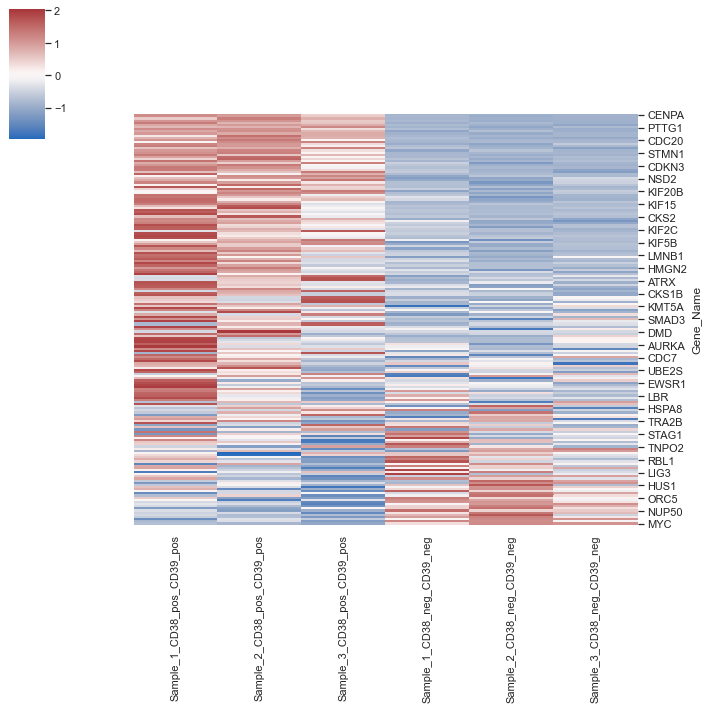

In [14]:
# z-score across rows (0)
g = sns.clustermap(df_G2M_viz, z_score=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=False, col_cluster=False )

# not all 193 genes are shown, likely due to figsize dimensions

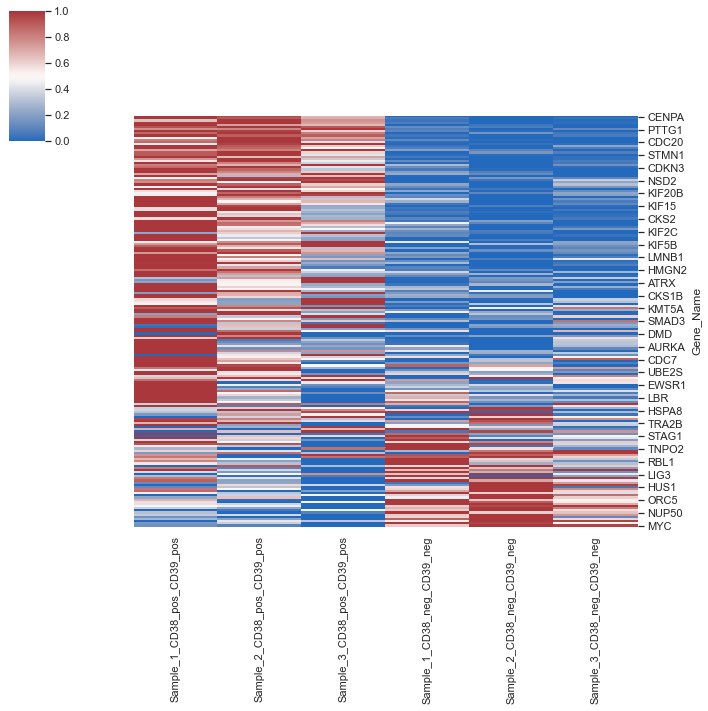

In [15]:
# standard_scale across rows (0)
g = sns.clustermap(df_G2M_viz, standard_scale=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=False, col_cluster=False)

# not all 193 genes are shown, likely due to figsize dimensions

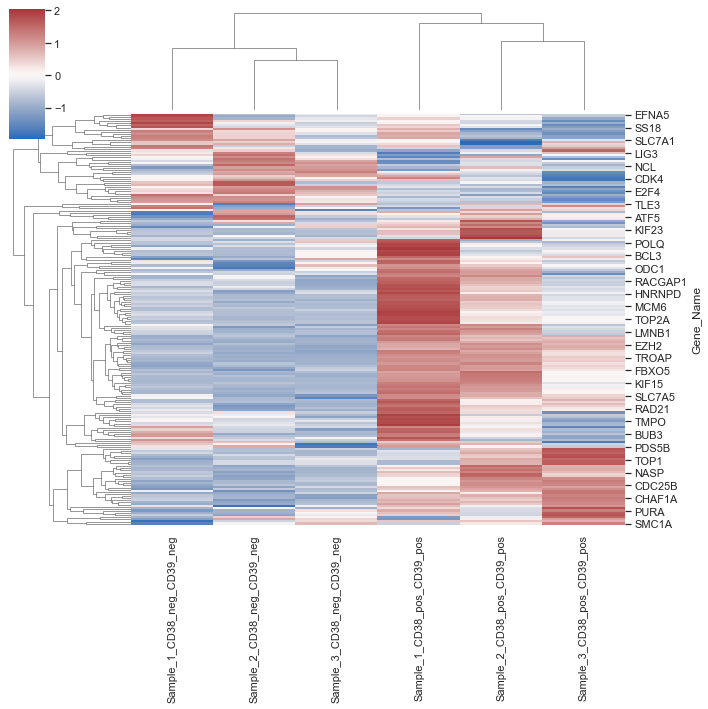

In [16]:
# z-score across rows (0)
# clustering by gene (rows) and by sample (columns)
g = sns.clustermap(df_G2M_viz, z_score=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=True, col_cluster=True )

# not all 193 genes are shown, likely due to figsize dimensions

# Additional downstream analysis of GSEA results
## how to identify important genes and reduce dimensioanlity of enriched gene sets?
## Leading Edge Analysis 
#### "leading-edge subset in a gene set are those genes that appear in the ranked list at or before the point at which the running sum reaches its maximum deviation from zero. The leading-edge subset can be interpreted as the core that accounts for the gene set’s enrichment signal"
### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5066188/

## Nonnegative Factorization to reduce dimensionality?
### http://ai.stanford.edu/~marinka/nimfa/
#### Tan et al 2016.  designed an analysis approach to identify sub-signatures of genes called “leading edge metagenes” (LEMs); non-negative matrix factorization (NMF) https://www.biorxiv.org/content/10.1101/043158v1.full


In [1]:
#perform Leading Edge Analysis in GSEA desktop application
#the pp_nn GSEA results
#output files in folder my_analysis.LeadingEdgeTool.1662111727343

In [4]:
#read in the gct file from the Leading Edge Analysis
#matrix of the 50 Hallmark pathways and Genes in that subset that account for the pathway's enrichment signal
#binary: 1 if the gene is found in that pathway
#some genes may be identified in more than one pathway (ie overlapping)
df_le= pd.read_csv('/Users/carol/gsea_home/output/sep02/my_analysis.LeadingEdgeTool.1662111727343/leading_edge_matrix_for_results.5.gct', 
                   skiprows=2, delimiter = '\t')

In [5]:
df_le.head()

,NAME,DESCRIPTION,POP7,NUP107,ZNF292,TMEM97,MYLK,PSMD8,PREX1,NSDHL,...,GBP2,BUB1,TCF7L1,PTCD2,PDE6G,NAP1L1,DLK2,WEE1,BAX,LTBR
0,HALLMARK_G2M_CHECKPOINT_signal,na,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HALLMARK_E2F_TARGETS_signal,na,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,HALLMARK_MITOTIC_SPINDLE_signal,na,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HALLMARK_INTERFERON_ALPHA_RESPONSE_signal,na,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HALLMARK_SPERMATOGENESIS_signal,na,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#there are 1195 genes identified as "leading-edge"
df_le.shape

(50, 1195)

In [16]:
# for a cluster/heatmap we just need gene names and expression values
# remove 'Description' column Not necessary. 
# reset index
df_le_viz= df_le.drop(columns=['DESCRIPTION'])
df_le_viz= df_le_viz.set_index(df_le_viz.columns[0])
df_le_viz= df_le_viz.rename_axis('Pathway_Name')

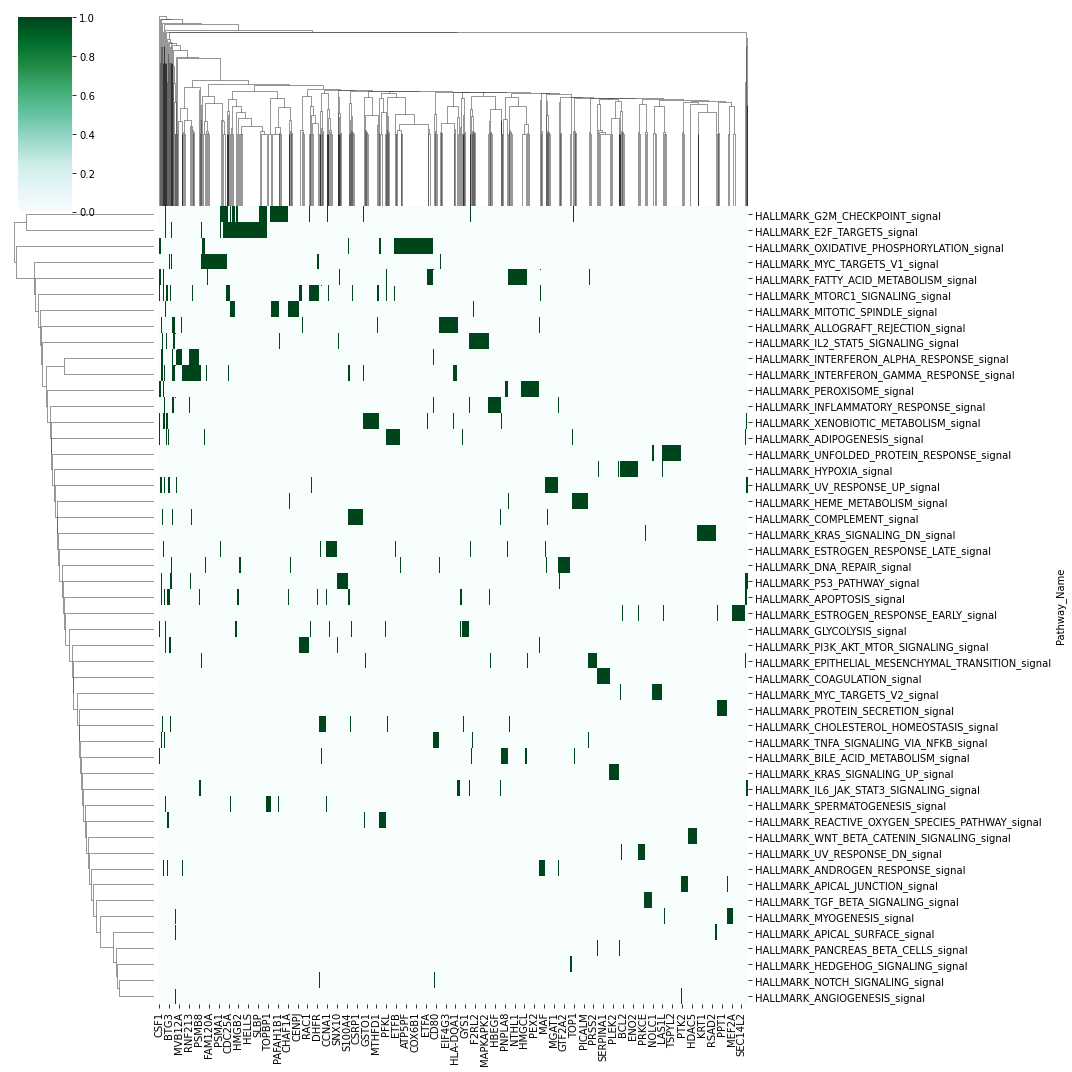

In [44]:
#cluster?
# binary: 1 if the gene is found in that pathway
# clustering by gene (rows) and by sample (columns)
g = sns.clustermap(df_le_viz, cmap="BuGn", figsize= (15, 15),
                 row_cluster=True, col_cluster=True )

In [28]:
#number of leading edge genes in the pathway
df_le_viz.sum(axis=1)

Pathway_Name
HALLMARK_G2M_CHECKPOINT_signal                       94.0
HALLMARK_E2F_TARGETS_signal                          99.0
HALLMARK_MITOTIC_SPINDLE_signal                      56.0
HALLMARK_INTERFERON_ALPHA_RESPONSE_signal            39.0
HALLMARK_SPERMATOGENESIS_signal                      19.0
HALLMARK_INTERFERON_GAMMA_RESPONSE_signal            65.0
HALLMARK_IL6_JAK_STAT3_SIGNALING_signal              20.0
HALLMARK_ESTROGEN_RESPONSE_LATE_signal               39.0
HALLMARK_APOPTOSIS_signal                            36.0
HALLMARK_IL2_STAT5_SIGNALING_signal                  56.0
HALLMARK_PI3K_AKT_MTOR_SIGNALING_signal              27.0
HALLMARK_COMPLEMENT_signal                           40.0
HALLMARK_OXIDATIVE_PHOSPHORYLATION_signal            93.0
HALLMARK_P53_PATHWAY_signal                          37.0
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY_signal      19.0
HALLMARK_CHOLESTEROL_HOMEOSTASIS_signal              22.0
HALLMARK_FATTY_ACID_METABOLISM_signal                63.0
H

In [29]:
#number of pathways the gene is associated
df_le_viz.sum(axis=0)

POP7      1.0
NUP107    1.0
ZNF292    1.0
TMEM97    1.0
MYLK      2.0
         ... 
NAP1L1    1.0
DLK2      1.0
WEE1      2.0
BAX       1.0
LTBR      1.0
Length: 1193, dtype: float64

In [ ]:
# filter pathways by gene size, FDR, NOMpval?